In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load the Dataset

In [2]:
data = pd.read_csv('../data/parkinsons.data')

# Exploratory Data Analysis

To understand the data's structure, we will look at the number of samples and features, as well as the types of features (e.g. whether they are numerical or categorical).

In [3]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Displaying the data in the cell above, we note the following:
- There are 195 samples. Each sample is a voice recording belonging to individuals identifiable under "name".
- There are 22 features in total. There are 24 columns, but "name" is used as an ID and "status" is used as the binary label, with 1 indicating Parkinson's and 0 indicating healthy. The remaining features are voice measures.
- As for feature types, we note that all features are continuous, or numerical. The variable "name" is categorical and "status" is categorical, as it is a binary indication of health status.

The data is comprised of "biomedical voice measurements from 31 people", for which 23 people have Parkinson's disease (PD) (Little et. al; 2008). For each voice measurement, 22 voice measures are identified (with no missing data for any measurement). Below is information provided by Little et. al. for the variables (features) in the Oxford Parkinnson's Disease Detection Dataset:
- name >> ASCII subject name and recording number
- MDVP:Fo(Hz) >> Average vocal fundamental frequency
- MDVP:Fhi(Hz) >> Maximum vocal fundamental frequency
- MDVP:Flo(Hz) >> Minimum vocal fundamental frequency
- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP >> Several measures of variation in fundamental frequency
- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA >> Several measures of variation in amplitude
- NHR, HNR >> Two measures of ratio of noise to tonal components in the voice
- status >> Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE, D2 >> Two nonlinear dynamical complexity measures
- DFA >> Signal fractal scaling exponent
- spread1, spread2, PPE >> Three nonlinear measures of fundamental frequency variation

### Missing Value Analysis
In this section, we will check for values we do not expect, such as null values or special characters

In [26]:
# Check if any numerical columns contain unexpected string values
def check_numerical_columns(df):
    encountered = False
    
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    string_cols = df.select_dtypes(include=['object']).columns
    
    print("Numerical columns:", list(numerical_cols))
    print("String columns:", list(string_cols))
    
    # Check if numerical columns contain any non-numeric strings
    for col in numerical_cols:
        non_numeric = pd.to_numeric(df[col], errors='coerce').isnull().sum()
        if non_numeric > 0:
            print(f"Warning: {col} has {non_numeric} non-numeric values")
            encountered = True

    return encountered

if (not check_numerical_columns(data)):
    print("\nNo problems to report here :)\n")

Numerical columns: ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
String columns: ['name']

No problems to report here :)



### Visualize Data Distributions

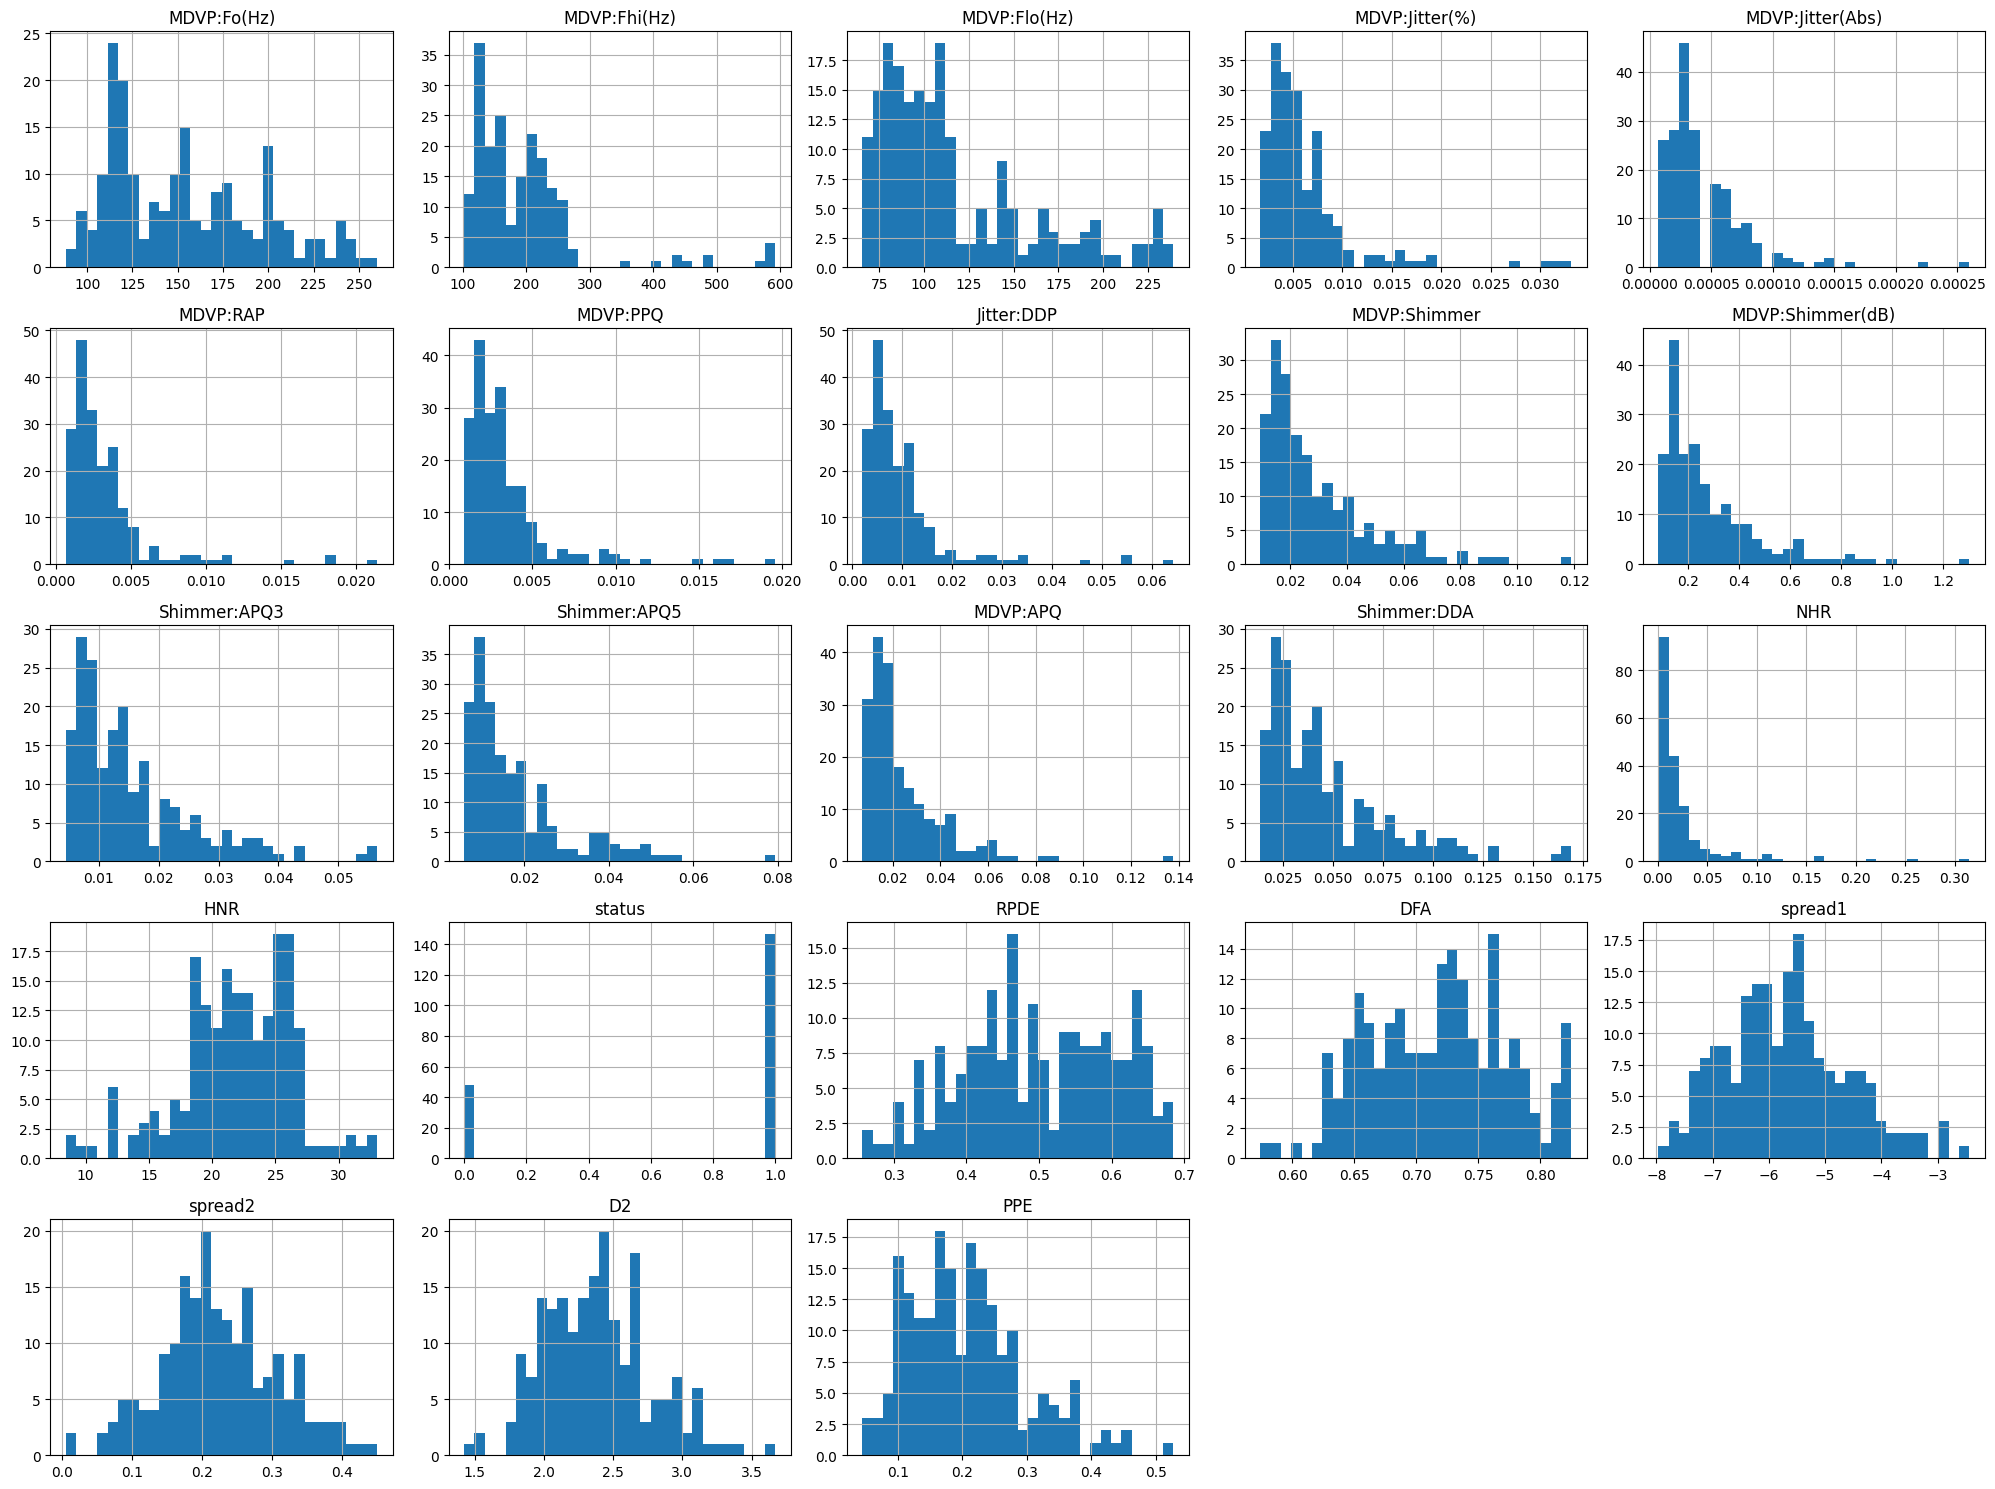

In [4]:
# Plot histograms for all features
data.hist(figsize = (20, 15), bins = 30)
plt.tight_layout()
plt.show()

In [5]:
units = {
    'MDVP:Fo(Hz)': 'Hz',
    'MDVP:Fhi(Hz)': 'Hz',
    'MDVP:Flo(Hz)': 'Hz',
    'MDVP:Jitter(%)': '%',
    'MDVP:Jitter(Abs)': 'Abs',
    'MDVP:RAP': '',
    'MDVP:PPQ': '',
    'Jitter:DDP': '',
    'MDVP:Shimmer': '',
    'MDVP:Shimmer(dB)': 'dB',
    'Shimmer:APQ3': '',
    'Shimmer:APQ5': '',
    'MDVP:APQ': '',
    'Shimmer:DDA': '',
    'NHR': '',
    'HNR': '',
    'status': '',
    'RPDE': '',
    'DFA': '',
    'spread1': '',
    'spread2': '',
    'D2': '',
    'PPE': ''
}

#### Histogram For a Specific Feature

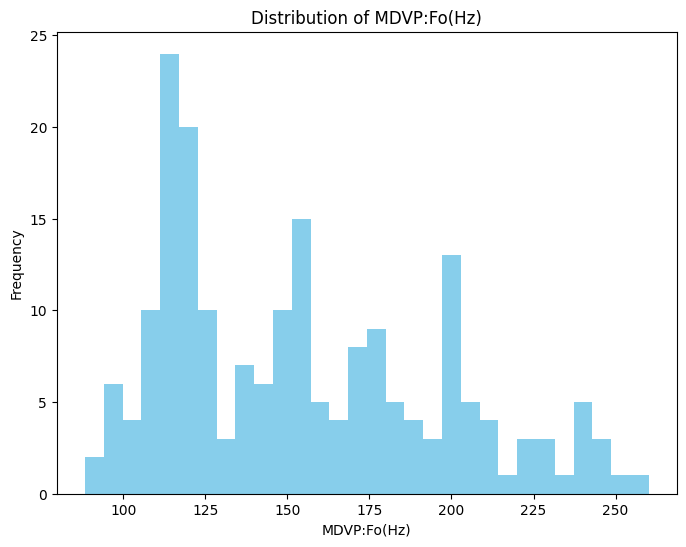

In [5]:
def histogram_spec_feature(feature):
    assert isinstance(feature, str)
    plt.figure(figsize = (8, 6))
    plt.hist(data[feature], bins = 30, color = 'skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

test_feature = 'MDVP:Fo(Hz)'  # Must include the full feature name, such as 'MDVP:Fo(Hz)' instead of 'MDVP:Fo'
histogram_spec_feature(test_feature)

#### Density Plot For a Specific Feature

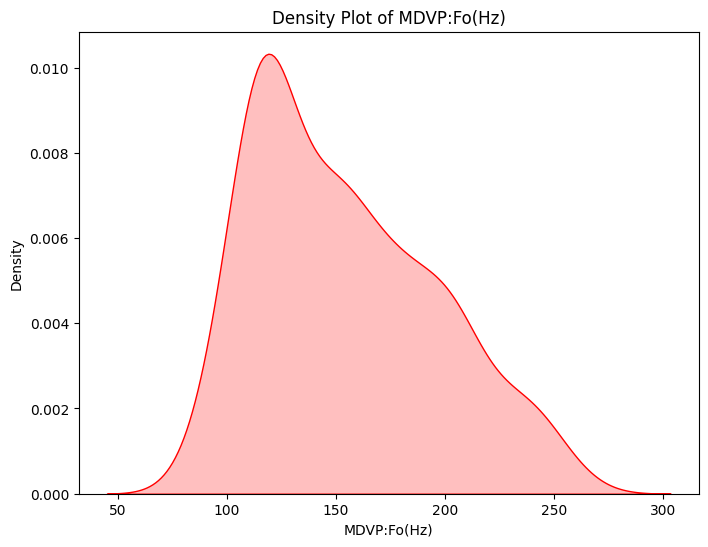

In [6]:
def density_spec_feature(feature):
    assert isinstance(feature, str)
    plt.figure(figsize = (8, 6))
    sns.kdeplot(data[feature], fill = True, color = 'red')
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

density_spec_feature(test_feature)

### Visualize Relationships Between Variables

In [7]:
features = list(data)

#### Pair Plots For Chosen Features

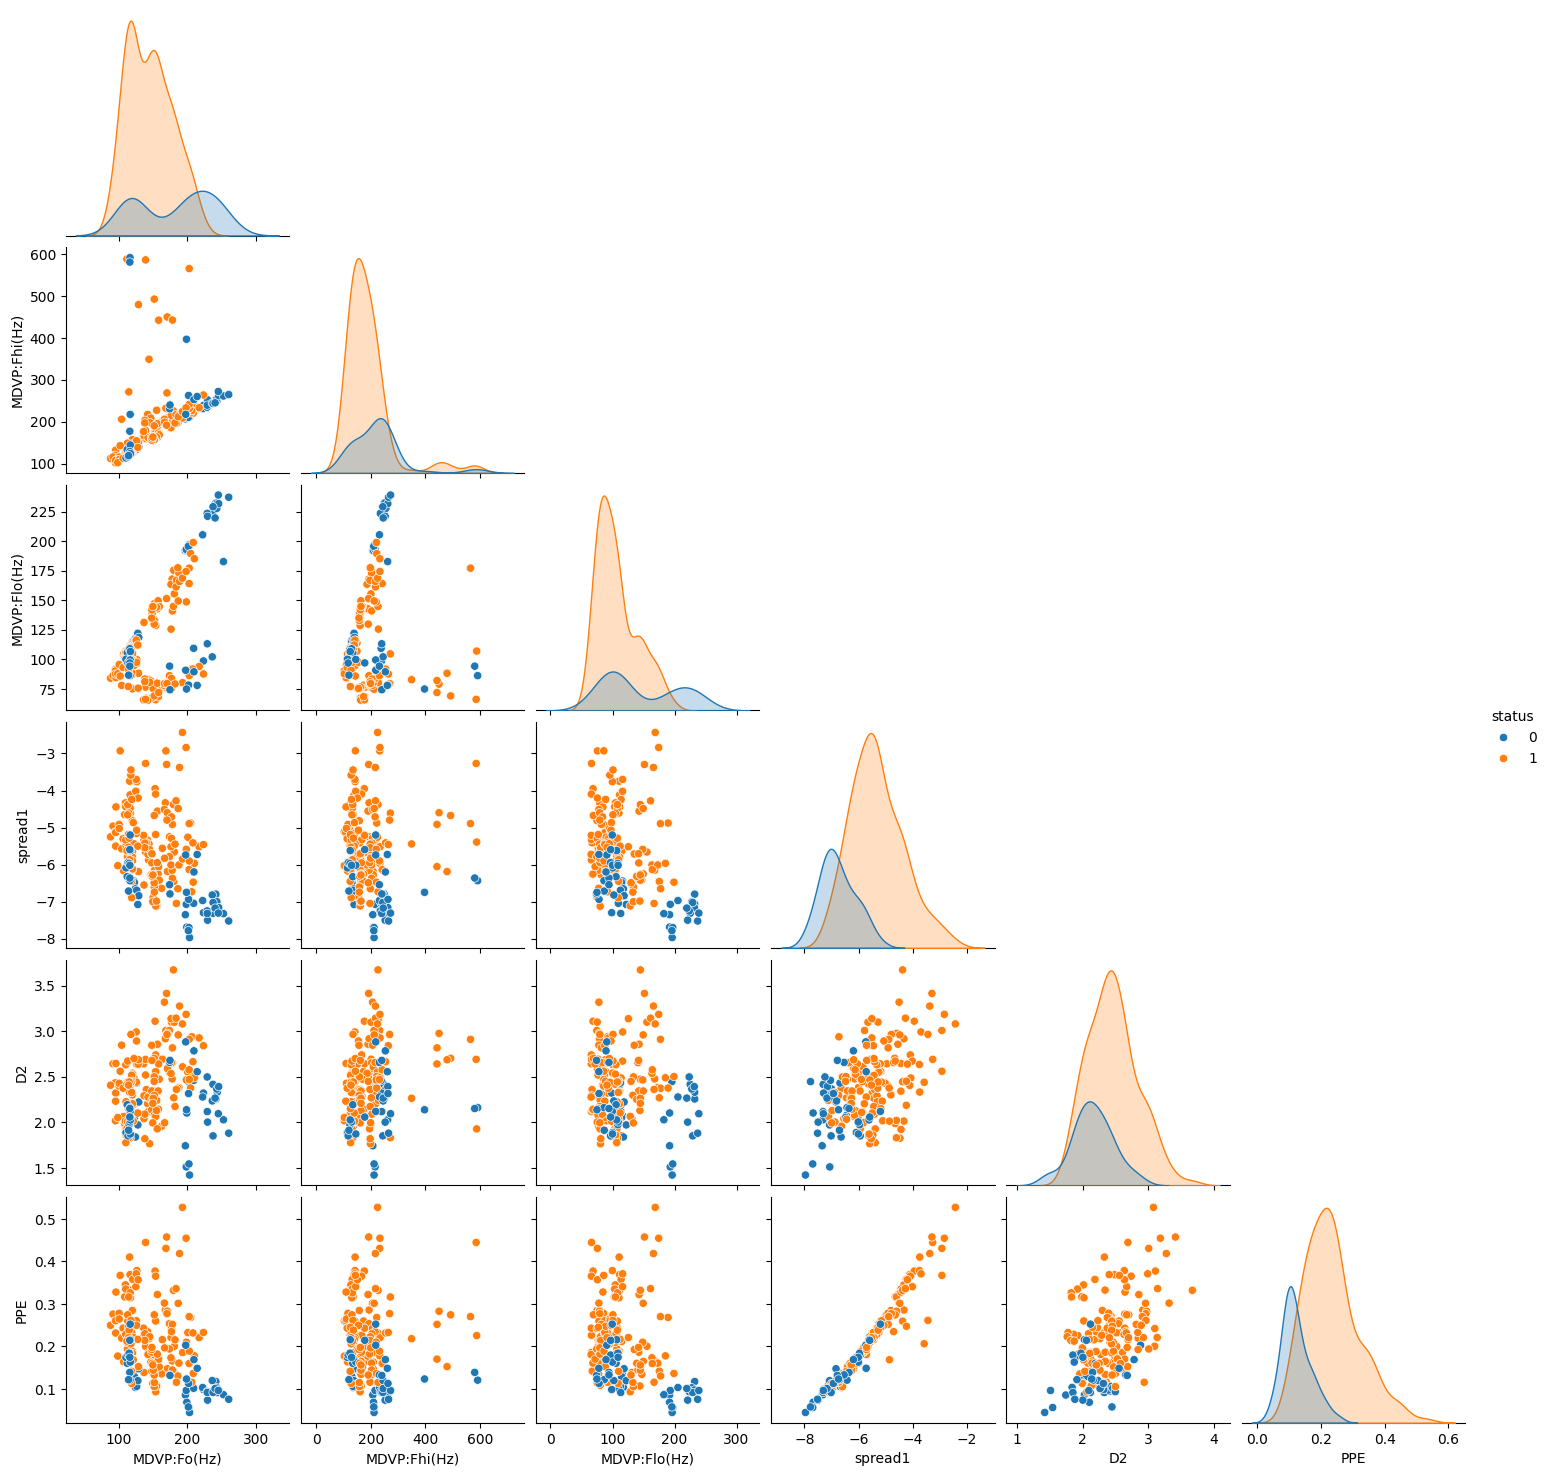

In [8]:
def pair_plots(feature_list):
    sns.pairplot(data[feature_list], hue = 'status', diag_kind = 'kde', corner = True)
    plt.show()

# Pick a subset of all the features - avoid overcrowding (recommended max = 5 features)
feature_list = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'spread1', 'D2', 'PPE', 'status'] 
pair_plots(feature_list)

#### Scatter Plot for Two Features

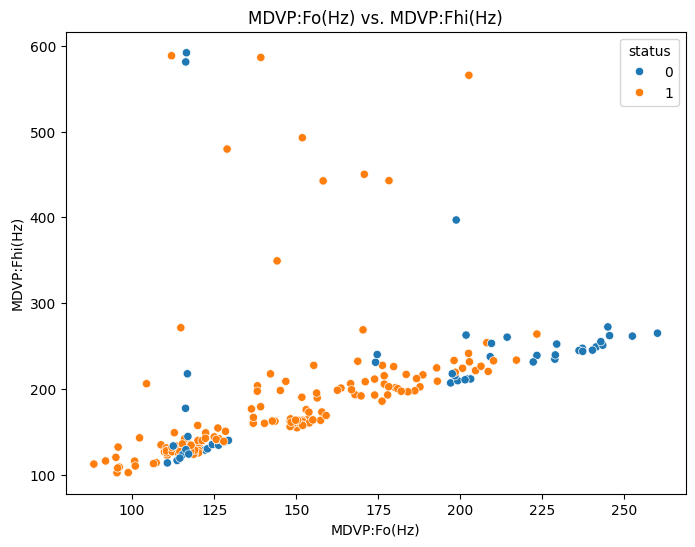

In [9]:
def scatter_plot(f_x, f_y):
    assert isinstance(f_x, str) and isinstance(f_y, str)
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = f_x, y = f_y, hue = 'status', data = data)
    plt.title(f'{f_x} vs. {f_y}')
    plt.xlabel(f'{f_x}')
    plt.ylabel(f'{f_y}')
    plt.show()

feature1 = 'MDVP:Fo(Hz)'
feature2 = 'MDVP:Fhi(Hz)'
scatter_plot(feature1, feature2)

### Correlation Matrix and Heatmap

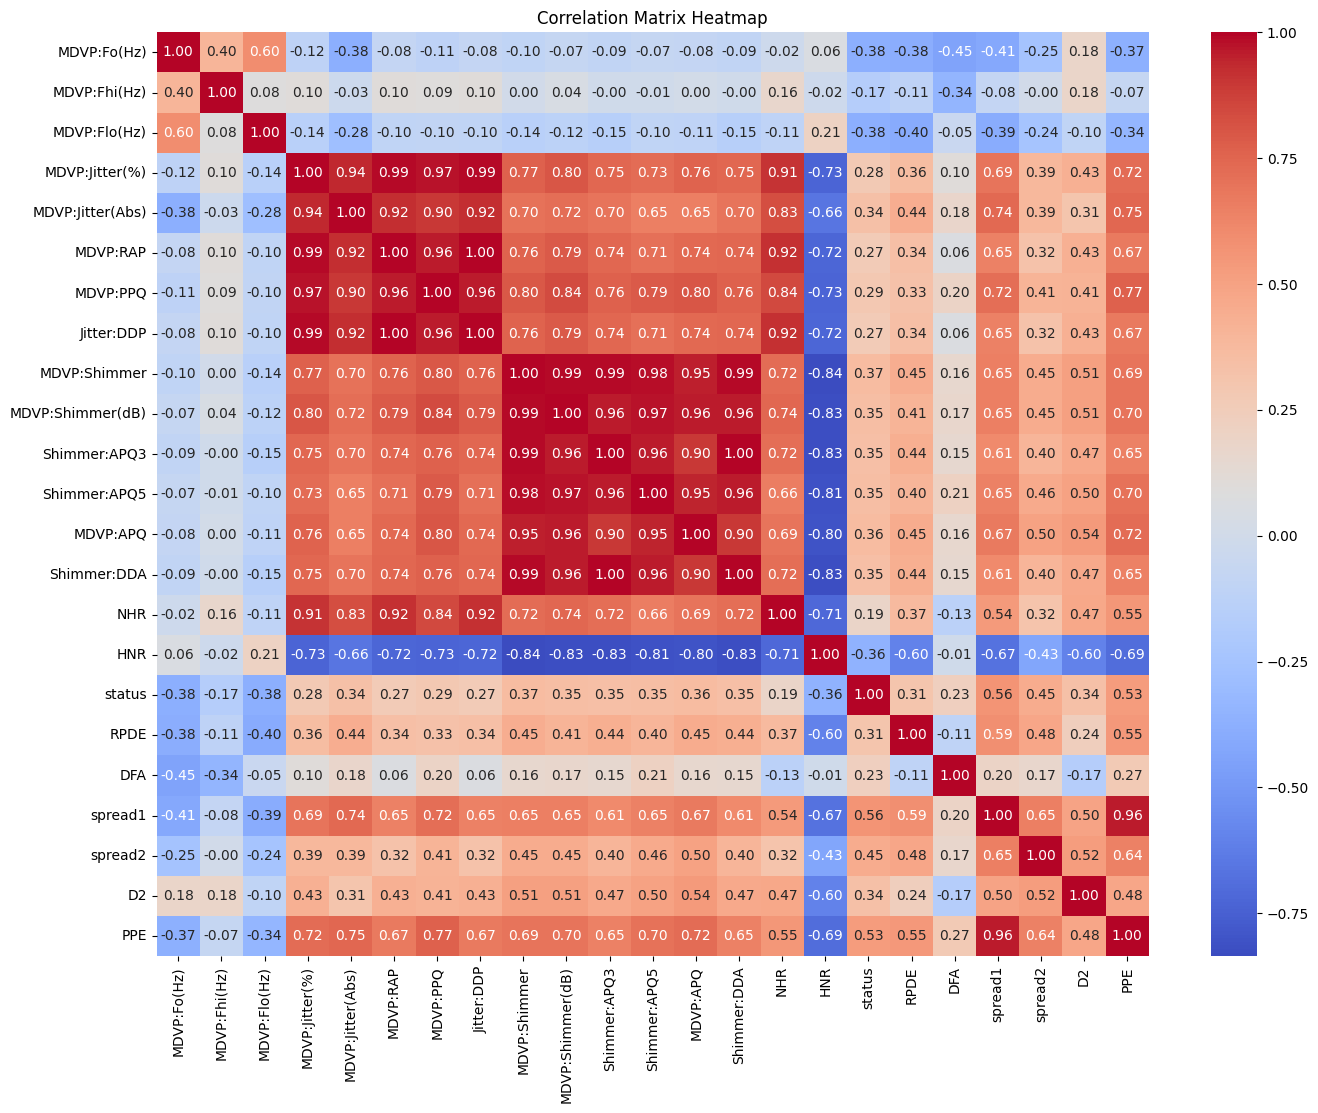

In [10]:
correlation_matrix = data[features[1:]].corr()

def heatmap(corr_matrix):
    plt.figure(figsize = (16, 12))
    sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

heatmap(correlation_matrix)

##### Interpretation:

We see a wide variety of correlation between features, ranging from almost perfectly and positively correlated (correlation value 1.00) to a mostly low-medium, negative correlation (-0.60 to -0.10). Looking at our heatmap, we note that the "HNR" feature shows strong negative correlation with most other features, judging by the darker notes of blue along its axes in the heatmap. This is notable because no other feature exhibits such a pattern. This pattern suggests that an increase in the feature "HNR" is likely met with a decrease in most other features, and vice versa. FINISH WRITEUP LATER!

# Data Preprocessing and Feature Engineering

Now, we would look for missing values in the dataset and adjust accordingly. But, according to a summary table provided by Little et. al. (2008) and our EDA, we notice that there are no missing voice measurements for voice recording. In other words, there is no adjustment to be done to the dataset.

For now, we will leave the outliers in the dataset. If you would like to remove outliers, you can use `data_refined` instead of `data`

In [12]:
def remove_outliers(dataset):
    # Check if need to copy? I think passing in dataset would allow the function to directly mutate it without copying it
    data_copy = dataset.copy() 

    # detect outliers

    # remove detected outliers from `data_copy`
    
    return "Not implemented yet!"

data_refined = remove_outliers(data)